Numpy 的优点：
ndarray，一个高效的多维数组，提供快速的面向数组的算术运算和灵活的广播功能
数学函数，用于对整个数据数组进行快速作，而无需编写循环
用于将阵列数据读取/写入磁盘以及处理内存映射文件的工具
线性代数、随机数生成和傅里叶变换能力
用于将 NumPy 与用 C、C++ 或 FORTRAN 编写的库连接起来的 C API

由于 NumPy 提供了全面且有据可查的 C API，因此将数据传递给用低级语言编写的外部库，以及外部库将数据作为 NumPy 数组返回给 Python 非常简单。此功能使 Python 成为包装旧版 C、C++ 或 FORTRAN 代码库并为其提供动态且可访问的界面的首选语言。

# 4.1 The NumPy ndarray: A Multidimensional Array Object

In [51]:
import numpy as np

my_arr = np.arange(1_000_000)

my_list = list(range(1_000_000))

%time for _ in range(10): my_arr2 = my_arr * 2

%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 9.24 ms, sys: 9.17 ms, total: 18.4 ms
Wall time: 19.2 ms
CPU times: user 420 ms, sys: 114 ms, total: 534 ms
Wall time: 545 ms


In [52]:
data = np.array([[1.5, -0.1, 3], [2, 0.5, 1]])
# ndarray 是元组的嵌套，数组内的元素必须是相同类型
# ndarray 的形状是一个元组，元组的长度就是数组的维度
data

array([[ 1.5, -0.1,  3. ],
       [ 2. ,  0.5,  1. ]])

In [53]:
data * 10

array([[15., -1., 30.],
       [20.,  5., 10.]])

In [54]:
data + data

array([[ 3. , -0.2,  6. ],
       [ 4. ,  1. ,  2. ]])

In [55]:
print(data.dtype)
print(data.shape) # 对于有 n 行和 m 列的矩阵，shape 将是 (n,m)

float64
(2, 3)


## Creating ndarrays

因为 numpy 主要用于数学计算，所以如果不明说，ndarray 的 type 是 float64

In [56]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [57]:
data2 = ([1, 2, 3, 4], [5, 6, 7, 8]) # nested tuple
data3 =[[[1, 2, 3], [4, 5, 6]]] # nested list
arr2 = np.array(data2)
arr3 = np.array(data3)

print(arr2)
print(arr3)

[[1 2 3 4]
 [5 6 7 8]]
[[[1 2 3]
  [4 5 6]]]


In [58]:
print(arr2.ndim) # 获取维度,how many dimensions?
print(arr2.shape) # (n_rows, n_cols) 行， 列
print(arr2.size) # size = n_rows * n_cols
print(arr1.dtype)
print(arr2.dtype)


2
(2, 4)
8
float64
int64


In [59]:
np.zeros(10) # 创建一个长度为10的零向量


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [60]:
np.ones((3, 6)) # 创建一个 3x6 的全 1 数组

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

  1. 一维数组 (1D Array):
       * 类比: 就像一个列表或者一排珠子。
       * 结构: 只有一个轴 (axis 0)，数据沿着这个轴展开。
       * 定位元素: 只需要1个索引，例如 arr[i]。

   2. 二维数组 (2D Array):
       * 类比: 就像一个表格、棋盘或者矩阵，有行和列。
       * 结构: 有两个轴 (axis 0 和 axis 1)。通常，axis 0 代表行，axis 1 代表列。
       * 定位元素: 需要2个索引，例如 arr[row, col]。

   3. 三维数组 (3D Array):
       * 类比:
         就像一个魔方或者一叠表格。它是一个包含多个二维数组的容器。
       * 结构: 有三个轴 (axis 0, axis 1, axis 2)。你可以想象成 axis 0 是选择哪一个“表格”，axis 1 是行，axis 2 是列。
       * 定位元素: 需要3个索引，例如 arr[table, row, col]。

In [61]:
empty1 = np.empty((2, 3, 2)) # 创建一个空的数组
print(empty1)
print(empty1.shape) # (n_rows, n_cols, n_channels)
print('--------------------------------')
print(empty1.ndim)

[[[5. 5.]
  [5. 5.]
  [3. 3.]]

 [[3. 3.]
  [1. 1.]
  [1. 1.]]]
(2, 3, 2)
--------------------------------
3


In [62]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [63]:
np.arange(15).reshape(3, 5) # 定义一个3行5列的数组

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [64]:
np.random.randn(4, 4)

array([[ 0.41241937,  1.48886034, -0.01000257,  0.91189358],
       [-0.39722132, -0.20219474, -0.44366754, -0.6689525 ],
       [-0.03292951, -0.78922882, -1.49580774,  0.46667485],
       [-0.39080947,  1.55104603,  1.83728807, -0.84456524]])

## Data Types for ndarrays

In [65]:
 arr1 = np.array([1, 2, 3, 4, 5], dtype=np.int32)
 arr2 = np.array([6, 7, 8, 9, 10], dtype=np.float64)
 
print(arr1.dtype)
print(arr2.dtype)

int32
float64


In [66]:
arr1_float = arr1.astype(np.float64)
print(arr1_float)
print(arr1_float.dtype)

[1. 2. 3. 4. 5.]
float64


将 float 转化为 int 会发生什么？

In [67]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr_int = arr.astype(np.int32) # 直接删掉小数位，而不是四舍五入
print(arr_int)
print(arr_int.dtype)

[ 3 -1 -2  0 12 10]
int32


In [68]:
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.bytes_) # 将字符串数组转换为浮点数
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [69]:
int_array = np.array(range(10), dtype=np.int32)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
print(int_array.astype(calibers.dtype))
print(int_array.dtype)
# 调用 astype 始终会创建一个新数组（数据的副本），即使新数据类型与旧数据类型相同。

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
int32


## Arithmetic with NumPy Arrays

数组很重要，因为它们使您能够在不编写任何 for 循环的情况下表达对数据的批处理作。NumPy 用户称之为矢量化 。大小相等的数组之间的任何算术运算都按元素应用运算：

In [70]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
print(arr * arr)
print(arr - arr)

[[ 1.  4.  9.]
 [16. 25. 36.]]
[[0. 0. 0.]
 [0. 0. 0.]]


In [71]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

## Basic Indexing and Slicing

In [72]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(arr[5])
print(arr[5:8])

6
[6 7 8]


In [73]:
arr[5:8] = 1279
arr

array([   1,    2,    3,    4,    5, 1279, 1279, 1279,    9,   10])

In [74]:
arr_slice = arr[5:8]
arr_slice[1] = 999
# 当在 arr_slice 中更改值时，突变会反映在原始数组 arr 中：
arr

array([   1,    2,    3,    4,    5, 1279,  999, 1279,    9,   10])

In [75]:
arr_slice[:] = 64 # 赋值给全部的arr_slice
arr

array([ 1,  2,  3,  4,  5, 64, 64, 64,  9, 10])

由于 NumPy 被设计为能够处理非常大的数组，因此如果 NumPy 坚持始终复制数据，您可以想象性能和内存问题。

如果你想要的是 ndarray 切片的副本而不是视图，则需要显式复制该数组，例如 arr[5:8].copy() 。正如你所见，pandas 也是这样工作的。
Numpy为了更高效地处理数据，因此与普通 python 不同，不允许频繁复制。

In [76]:
arr_copy = arr[5:8].copy() # 用copy()方法创建一个数组的副本
arr_copy = 13
arr

array([ 1,  2,  3,  4,  5, 64, 64, 64,  9, 10])

In [77]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [78]:
arr2d[0][2] # 0行2列

np.int64(3)

In [79]:
arr2d[0,2] # 0行2列
# 与上一段代码等价

np.int64(3)

In [80]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [81]:
arr3d[1]

array([[ 7,  8,  9],
       [10, 11, 12]])

In [82]:
old_values = arr3d[1].copy()
arr3d[1] = 12 # 赋值
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[12, 12, 12],
        [12, 12, 12]]])

In [83]:
arr3d[1] = old_values # 再次赋值
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [84]:
arr3d[1,0]

array([7, 8, 9])

In [85]:
x = arr3d[0] # 获取第一个子数组
x[0] # 获取第一个子数组的第一个元素

array([1, 2, 3])

In [86]:
arr

array([ 1,  2,  3,  4,  5, 64, 64, 64,  9, 10])

In [87]:
arr[1:6] 
# 索引第 2 到第 6 个元素
# 从1开始，到6结束，不包括6
# 索引从0开始

array([ 2,  3,  4,  5, 64])

In [88]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [89]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [90]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [91]:
lower_dim_slice = arr2d[1, :2]
lower_dim_slice

array([4, 5])

In [92]:
lower_dim_slice.shape

(2,)

In [93]:
arr2d[:2, 2:] # 获取前2行【0,1】，从第2列开始的所有元素

array([[3],
       [6]])

In [94]:
arr2d[:2,2]

array([3, 6])

In [95]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

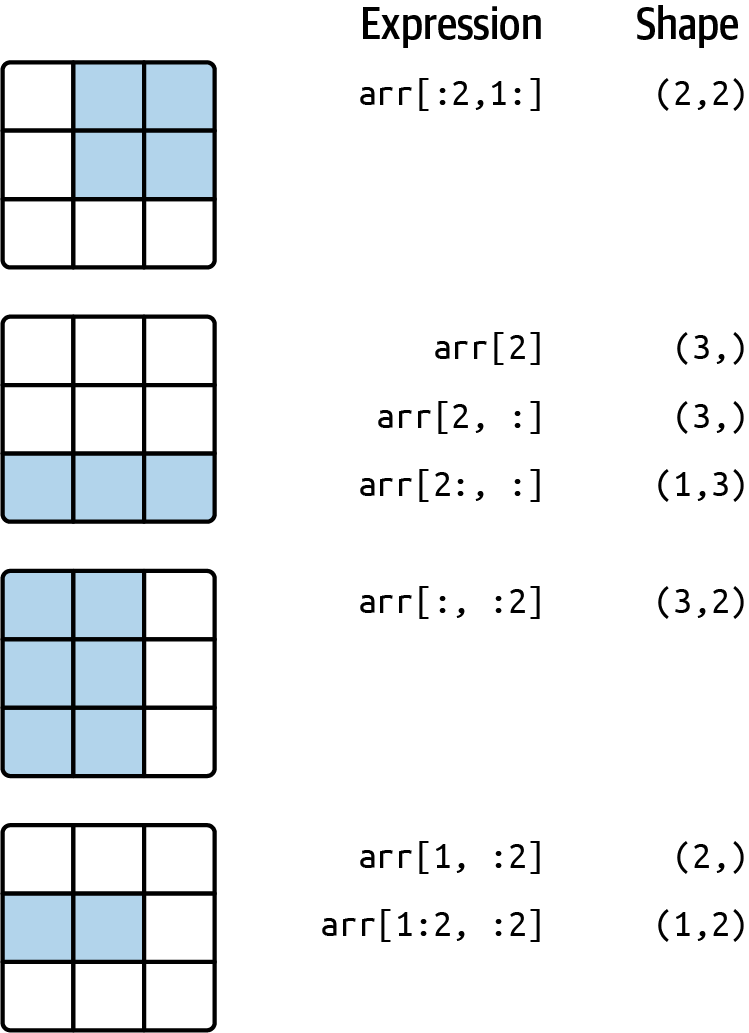

## Boolean Indexing

In [96]:
names = np.array(["bob", "joe", "will", "bob", "will", "joe", "joe"])

data =  np.array([[4, 7], [0, 2], [-5, 6], [0, 12], [-1, 12], [7, 4], [2, -5]])

names

array(['bob', 'joe', 'will', 'bob', 'will', 'joe', 'joe'], dtype='<U4')

In [97]:
data

array([[ 4,  7],
       [ 0,  2],
       [-5,  6],
       [ 0, 12],
       [-1, 12],
       [ 7,  4],
       [ 2, -5]])

In [98]:
print(names.shape)
print(data.shape)

(7,)
(7, 2)


In [99]:
names == 'bob'

array([ True, False, False,  True, False, False, False])

In [100]:
data[names == 'bob']

array([[ 4,  7],
       [ 0, 12]])

In [101]:
# boolean match method
array([[ 4,  7],  #True
       [ 0,  2],  #False
       [-5,  6],  #False
       [ 0, 12],  #True
       [-1, 12],  #False
       [ 7,  4],  #False
       [ 2, -5]]) #False

NameError: name 'array' is not defined

In [ ]:
data[names == 'bob', 1:]

array([[ 7],
       [12]])

In [ ]:
data[names == 'bob', 1]

array([ 7, 12])

In [ ]:
print(~(names == 'bob'))
# “～”语法是取布尔值的相反值，在复杂布尔值算法下，非常方便。
print((names != 'bob'))

[False  True  True False  True  True  True]
[False  True  True False  True  True  True]


In [ ]:
data[names != 'bob']

array([[ 0,  2],
       [-5,  6],
       [-1, 12],
       [ 7,  4],
       [ 2, -5]])

In [ ]:
cond = names == 'bob'

data[~cond]

array([[ 0,  2],
       [-5,  6],
       [-1, 12],
       [ 7,  4],
       [ 2, -5]])

通过布尔索引从数组中选择数据并将结果分配给新变量始终会创建数据的副本，即使返回的数组没有改变。

Python 关键字 and 和 or 不适用于布尔数组。请使用 & （与）和 | （或）代替。

In [ ]:
mask = (names == 'bob') | (names == 'will')
mask

array([ True, False,  True,  True,  True, False, False])

In [ ]:
mask2 = (names == 'bob') & (names == 'will')
mask2

array([False, False, False, False, False, False, False])

使用布尔数组设置值的方法

In [ ]:
data[data < 0] = 55 # Set all negative values to 55
data

array([[ 4,  7],
       [ 0,  2],
       [55,  6],
       [ 0, 12],
       [55, 12],
       [ 7,  4],
       [ 2, 55]])

In [ ]:
data[:, 1] = 1
data

array([[7, 1],
       [0, 1],
       [7, 1],
       [7, 1],
       [7, 1],
       [7, 1],
       [2, 1]])

In [ ]:
data[names != 'joe', 0] = 7
data

array([[7, 1],
       [0, 1],
       [7, 1],
       [7, 1],
       [7, 1],
       [7, 1],
       [2, 1]])

## fancy indexing
与普通索引的区别
- 普通索引 arr[1:3] 会选择连续的行（从索引1到索引2）
- 花式索引 arr[[4, 3, 0, 6]] 允许您选择任意行并按照您指定的顺序排列

In [ ]:
arr = np.zeros((8,4))
arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
for i in range(8):
    arr[i] = i # 为数组赋值1-8
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [ ]:
# 按特定顺序选择行的子集
arr[[4, 3, 0, 6]] # 双中括号 == 花式索引

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [ ]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [ ]:
arr =  np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [ ]:
index_arr = arr[[1, 5, 7, 2], [0, 3, 1, 2]]
index_arr
#  * 第一个列表 [1, 5, 7, 2] 是 行索引。
#  * 第二个列表 [0, 3, 1, 2] 是 列索引。
# 现在，我们根据这些坐标从原始数组 arr 中提取对应的元素：
#  * arr[1, 0] -> 在 arr 中找到第1行、第0列的元素，即 4。
#  * arr[5, 3] -> 在 arr 中找到第5行、第3列的元素，即 23。
#  * arr[7, 1] -> 在 arr 中找到第7行、第1列的元素，即 29。
#  * arr[2, 2] -> 在 arr 中找到第2行、第2列的元素，即 10

array([ 4, 23, 29, 10])

In [ ]:
index_arr[:] = 0
print(arr) # 原数组
print(index_arr) # 返回副本
print(np.shares_memory(arr, index_arr)) # 检查两个数组是否共享内存  

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
[0 0 0 0]
False


In [ ]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]] = 0
arr

array([[ 0,  1,  2,  3],
       [ 0,  5,  6,  7],
       [ 8,  9,  0, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22,  0],
       [24, 25, 26, 27],
       [28,  0, 30, 31]])

In [ ]:
arr_chain = np.arange(32,64).reshape(8, 4) # 创建32-63的8行4列的数组
arr_chain

array([[32, 33, 34, 35],
       [36, 37, 38, 39],
       [40, 41, 42, 43],
       [44, 45, 46, 47],
       [48, 49, 50, 51],
       [52, 53, 54, 55],
       [56, 57, 58, 59],
       [60, 61, 62, 63]])

In [ ]:
arr_chain[[1, 5, 7, 2]][:, [0, 3, 1, 2]]
# 第一步：arr_chain[[1, 5, 7, 2]] 选择第1、5、7、2行
# 第二步：[:, [0, 3, 1, 2]] 选择所有行，按第0、3、1、2列排序

array([[36, 39, 37, 38],
       [52, 55, 53, 54],
       [60, 63, 61, 62],
       [40, 43, 41, 42]])

In [ ]:
# 原始数组
arr = np.array([[ 0,  1,  2,  3],
                [ 0,  5,  6,  7],
                [ 8,  9,  0, 11],
                [12, 13, 14, 15],
                [16, 17, 18, 19],
                [20, 21, 22,  0]])

# --- 你的操作：变量重新赋值 ---
print("--- 行为1: 变量重新赋值 ---")
index_arr2_reassigned = arr[0:5]
index_arr2_reassigned = 0 # 只是让变量名指向了整数0
print(f"index_arr2_reassigned 的值现在是: {index_arr2_reassigned}")

print(arr) # arr 没有任何变化

# --- 正确的修改方式：就地修改 ---
print("--- 行为2: 就地修改视图内容 ---")
# 重新获取视图，避免被上面的操作影响
index_arr2_view = arr[0:5]
index_arr2_view[:] = 0 # 修改视图的所有元素内容
print(f"index_arr2_view 的值现在是:\n{index_arr2_view}")
print(arr) # arr 的前5行被成功修改为

--- 行为1: 变量重新赋值 ---
index_arr2_reassigned 的值现在是: 0
[[ 0  1  2  3]
 [ 0  5  6  7]
 [ 8  9  0 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22  0]]


--- 行为2: 就地修改视图内容 ---
index_arr2_view 的值现在是:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
原数组 arr 是否改变？
[[ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [20 21 22  0]]


## Transposing Arrays and Swapping Axes

In [ ]:
arr_t = np.arange(15).reshape(3,5)
print(arr_t)
print(arr_t.T)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


矩阵乘法的规则是：结果矩阵中第 i 行、第 j 列的元素，等于第一个矩阵的第 i 行与第二个矩阵的第 j 列的点积


In [ ]:
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])

print(arr)

np.dot(arr.T, arr)

[[ 0  1  0]
 [ 1  2 -2]
 [ 6  3  2]
 [-1  0 -1]
 [ 1  0  1]]


array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [ ]:
      我们来手动计算结果矩阵的第一个元素 `[0, 0]` (值为39) 是如何得到的：

       * 取 arr.T 的 第0行: [0, 1, 6, -1, 1]
       * 取 arr 的 第0列: [0, 1, 6, -1, 1]
       * 计算它们的点积：
          (0*0) + (1*1) + (6*6) + (-1*-1) + (1*1) = 0 + 1 + 36 + 1 + 1 = 39

      再来计算一个，比如结果矩阵的 `[1, 2]` 元素 (值为2)：

       * 取 arr.T 的 第1行: [1, 2, 3, 0, 0]
       * 取 arr 的 第2列: [0, -2, 2, -1, 1]
       * 计算它们的点积：
          (1*0) + (2*-2) + (3*2) + (0*-1) + (0*1) = 0 - 4 + 6 + 0 + 0 = 2

      以此类推，计算出整个 3x3 矩阵的所有元素。
      
   * 维度匹配: 只有当第一个矩阵的列数 (arr.T 的列数 = 5) 等于第二个矩阵的行数 (arr 的行数 = 5) 时，矩阵乘法才能进行。
   * 结果维度: 结果矩阵的形状由第一个矩阵的行数和第二个矩阵的列数决定，即 (3, 3)。
   * 应用: 这个操作在很多领域都有应用，例如在统计学中计算协方差矩阵，或是在机器学习中用于降维算法（如PCA）的计算。

In [ ]:
   1       A (2x3)                B (3x2)                   C (2x2)
   2   ┌           ┐          ┌       ┐                 ┌         ┐
   3   │ 1   2   3 │          │ 7   8 │                 │ C₁₁ C₁₂ │
   4   │ 4   5   6 │          │ 9  10 │                 │ C₂₁ C₂₂ │
   5   └           ┘          │ 11 12 │                 └         ┘
   6                          └       ┘
   7       C₁₁ = (1 * 7)  +  (2 * 9)  +  (3 * 11)
   8           =   7      +    18     +     33     = 58
   9       C₁₂ = (1 * 8)  +  (2 * 10) +  (3 * 12)
   10          =   8      +    20     +     36     = 64

In [ ]:
arr.T @ arr # matrix multiplication 等效于 np.dot(arr, arr)

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [ ]:
arr.swapaxes(0, 1) # 等效于 arr.T

array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

# 4.2 Pseudorandom Number Generation 伪随机生成

numpy.random 模块补充了内置的 Python  随机模块，其中包含从多种概率分布中高效生成整个样本值数组的函数。例如，您可以使用 numpy.random.standard_normal 以下命令从标准正态分布中获得 4 × 4 个样本数组：

In [ ]:
samples = np.random.standard_normal(size = (4,4))
samples

array([[ 0.80497581, -1.19358103,  1.95863707, -0.12195206],
       [ 1.12071086,  1.56284218,  1.50387232,  0.85539341],
       [-1.35008863, -0.41909467, -0.95083924,  2.64394719],
       [ 0.12340565,  0.65596409, -0.33311596,  1.65355827]])

python built-in method 🆚 numpy method

In [ ]:
from random import normalvariate

N = 1_000_000

%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.standard_normal(N)

528 ms ± 32.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
35.9 ms ± 2.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


explicit generator 显式生成器

In [ ]:
rng = np.random.default_rng(seed=12345) # 种子为12345的显式生成器
data = rng.standard_normal((2,3))
data

array([[-1.42382504,  1.26372846, -0.87066174],
       [-0.25917323, -0.07534331, -0.74088465]])

In [ ]:
rng_reuse = np.random.default_rng(seed=12345) # 显式生成器复用
data2 = rng_reuse.standard_normal((2,3))
data2 # 随机数果相同

array([[-1.42382504,  1.26372846, -0.87066174],
       [-0.25917323, -0.07534331, -0.74088465]])

In [ ]:
rng_new = np.random.default_rng(seed=123) # 创建新的显式生成器
data3 = rng_new.standard_normal((2,3))
data3 # 随机数果不同

array([[-0.98912135, -0.36778665,  1.28792526],
       [ 0.19397442,  0.9202309 ,  0.57710379]])

In [ ]:
type(rng)

numpy.random._generator.Generator

# 4.3 Universal Functions: Fast Element-Wise Array Functions
快速元素数组函数

In [ ]:
arr = np.arange(10)
print(np.sqrt(arr)) # sqrt ^0.5
print(np.exp(arr)) # e^x

[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


In [ ]:
x = rng.standard_normal(5)
y = rng.standard_normal(5)
print(x)
print(y)
print(np.maximum(x,y)) 
print(np.add(x,y)) 

[ 0.7519394  -0.65876032 -1.22867499  0.25755777  0.31290292]
[-0.13081169  1.26998312 -0.09296246 -0.06615089 -1.10821447]
[ 0.7519394   1.26998312 -0.09296246  0.25755777  0.31290292]
[ 0.62112771  0.6112228  -1.32163744  0.19140688 -0.79531155]


In [ ]:
arr = rng.standard_normal(7) * 5
arr

array([0.67978425, 6.73538882, 0.3057201 , 0.354573  , 2.16827269,
       1.3874183 , 2.65126193])

In [ ]:
remainder, whole_part = np.modf(arr) # 返回小数部分和整数部分
print(remainder)
whole_part

[0.67978425 0.73538882 0.3057201  0.354573   0.16827269 0.3874183
 0.65126193]


array([0., 6., 0., 0., 2., 1., 2.])

Ufuncs 接受一个可选的 out 参数，该参数允许它们将结果分配给现有数组（通常为 out = np.empty_like(x) 或 原对象），而不是创建一个新数组。因为 ufuncs 每运行一次，就会创建一块新的内存，所以通常情况下，out 参数省内存

In [ ]:
arr
print(arr)

out = np.zeros_like(arr)
# 输出：[0. 0. 0. 0. 0. 0. 0.]

np.add(arr, 1, out=out) # 将数组状态存到out中
np.add(arr, 1, out=arr) # 将结果存到arr中

print(out)
print(arr)
# 结果相同

[0.67978425 6.73538882 0.3057201  0.354573   2.16827269 1.3874183
 2.65126193]
[1.67978425 7.73538882 1.3057201  1.354573   3.16827269 2.3874183
 3.65126193]
[1.67978425 7.73538882 1.3057201  1.354573   3.16827269 2.3874183
 3.65126193]


# 4.4 Array-Oriented Programming with Arrays
面向数组的编程

使用 NumPy 数组使您能够将多种类型的数据处理任务表示为简洁的数组表达式，否则可能需要编写循环。这种用数组表达式替换显式循环的做法被一些人称为矢量化 。一般来说，矢量化数组运算通常比纯 Python 等效运算快得多。

In [ ]:
points = np.arange(-50, 50, 1) # numpy.arange([start, ]stop, [step, ], dtype=None)
# -5到5之间，步长为1
print(points)

[-50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33
 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15
 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3
   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49]


实际应用：在网格上计算函数

`meshgrid` 最大的用途是进行向量化计算。假设我们有一个函数 z = x^2 + y，我们想计算网格上每个点的 z 值。利用 meshgrid 生成的 xx 和 yy，我们不需要写循环，可以直接进行矩阵运算。

`np.meshgrid` 是一个强大的工具，它为你搭建了一个舞台（坐标网格），让你可以非常高效地在整个二维空间上进行计算和绘图，而无需编写繁琐的循环。这在科学计算、机器学习和数据可视化（如绘制等高线图、3D曲面图）中是不可或缺的一步。

In [ ]:
xs, ys = np.meshgrid(points, points)
ys

array([[-50, -50, -50, ..., -50, -50, -50],
       [-49, -49, -49, ..., -49, -49, -49],
       [-48, -48, -48, ..., -48, -48, -48],
       ...,
       [ 47,  47,  47, ...,  47,  47,  47],
       [ 48,  48,  48, ...,  48,  48,  48],
       [ 49,  49,  49, ...,  49,  49,  49]], shape=(100, 100))

In [ ]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[70.71067812, 70.00714249, 69.3108938 , ..., 68.62215386,
        69.3108938 , 70.00714249],
       [70.00714249, 69.29646456, 68.59300256, ..., 67.89698079,
        68.59300256, 69.29646456],
       [69.3108938 , 68.59300256, 67.88225099, ..., 67.17886572,
        67.88225099, 68.59300256],
       ...,
       [68.62215386, 67.89698079, 67.17886572, ..., 66.46803743,
        67.17886572, 67.89698079],
       [69.3108938 , 68.59300256, 67.88225099, ..., 67.17886572,
        67.88225099, 68.59300256],
       [70.00714249, 69.29646456, 68.59300256, ..., 67.89698079,
        68.59300256, 69.29646456]], shape=(100, 100))

In [ ]:
a = [1, 2, 3]
b = [4, 5]
x, y = np.meshgrid(a, b) # 向量化之后，才能用于 numpy ufuncs 的计算
print(x)
print(y)

[[1 2 3]
 [1 2 3]]
[[4 4 4]
 [5 5 5]]


In [ ]:
cal = np.sqrt(x + y)
cal

array([[2.23606798, 2.44948974, 2.64575131],
       [2.44948974, 2.64575131, 2.82842712]])

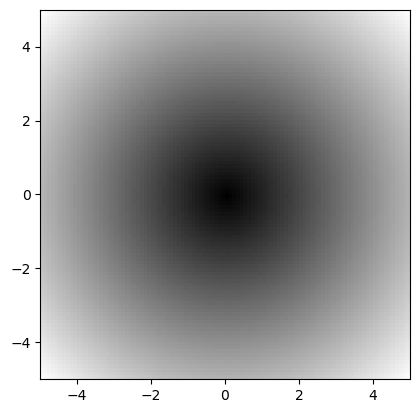

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])

In [ ]:
plt.close("all")

## Expressing Conditional Logic as Array Operations

numpy.where 函数是三元表达式 x if 条件 else y 的矢量化版本。

In [ ]:
import numpy as np
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])
result1 = [(x if c else y) 
           for x, y, c in zip(xarr, yarr, cond)]

result1

[np.float64(1.1),
 np.float64(2.2),
 np.float64(1.3),
 np.float64(1.4),
 np.float64(2.5)]

In [ ]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [ ]:
rng = np.random.default_rng(seed = 12345) # 创建显式生成器

arr = rng.standard_normal((4,4))
print(arr)

print(arr > 0)

result2 = np.where(arr > 0, 2, -2) # 2 if arr > 0 else -2
print(result2)

result3 = np.where(arr > 0, 2, arr) # 2 if arr > 0 else arr 正值全部替换为2
print(result3)

[[-1.42382504  1.26372846 -0.87066174 -0.25917323]
 [-0.07534331 -0.74088465 -1.3677927   0.6488928 ]
 [ 0.36105811 -1.95286306  2.34740965  0.96849691]
 [-0.75938718  0.90219827 -0.46695317 -0.06068952]]
[[False  True False False]
 [False False False  True]
 [ True False  True  True]
 [False  True False False]]
[[-2  2 -2 -2]
 [-2 -2 -2  2]
 [ 2 -2  2  2]
 [-2  2 -2 -2]]
[[-1.42382504  2.         -0.87066174 -0.25917323]
 [-0.07534331 -0.74088465 -1.3677927   2.        ]
 [ 2.         -1.95286306  2.          2.        ]
 [-0.75938718  2.         -0.46695317 -0.06068952]]


## Mathematical and Statistical Methods

In [105]:
arr = rng.standard_normal((5,4))
print(arr)
print(arr.mean()) # 既是方法
print(np.mean(arr)) # 也是函数
print(arr.sum())

[[ 0.30003095 -1.60270159  0.26679883 -1.26162378]
 [-0.07127081  0.47404973 -0.41485376  0.0977165 ]
 [-1.64041784 -0.85725882  0.68828179 -1.15452958]
 [ 0.65045239 -1.38835995 -0.90738246 -1.09542531]
 [ 0.00714569  0.5343599  -1.06580785 -0.18147274]]
-0.43111343540293595
-0.43111343540293595
-8.62226870805872


In [ ]:
arr[0] = 1
print(arr)
print(arr.mean(axis = 0)) # 计算每列的均值
print(arr.mean(axis = 1)) # 计算每行的均值

[[ 1.          1.          1.          1.        ]
 [-0.07127081  0.47404973 -0.41485376  0.0977165 ]
 [-1.64041784 -0.85725882  0.68828179 -1.15452958]
 [ 0.65045239 -1.38835995 -0.90738246 -1.09542531]
 [ 0.00714569  0.5343599  -1.06580785 -0.18147274]]
[-0.01081811 -0.04744183 -0.13995246 -0.26674223]
[ 1.          0.02141042 -0.74098111 -0.68517883 -0.17644375]


In [109]:
arr = np.array([1,2, 3, 4, 5, 6, 7, 8, 9])
print(arr.cumsum()) # 累计和
print(arr.cumprod()) # 累计积

[ 1  3  6 10 15 21 28 36 45]
[     1      2      6     24    120    720   5040  40320 362880]


In [ ]:
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(arr)
print(arr.cumsum(axis=0)) # 按列纵向累计
print(arr.cumsum(axis=1)) # 按行横向累计

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 1  2  3]
 [ 5  7  9]
 [12 15 18]]
[[ 1  3  6]
 [ 4  9 15]
 [ 7 15 24]]


## Methods for Boolean Arrays

True = 1
False = 0
所以 arr.sum() 就是 arr 中 True 的个数

In [ ]:
arr = rng.standard_normal(100)
print((arr>0).sum()) # 正数的个数
print((arr<=0).sum()) # 非正数的个数

48
52


any 和 all，对于布尔数组特别有用。any 测试数组中的一个或多个值是否为 True，而 all 检查每个值是否为 True：

In [ ]:
print((arr>0).any()) # 数组中是否有正数
print((arr>0).all()) # 数组中是否所有值都为正数

print(arr.any()) # 这些方法也适用于非布尔数组，其中非零元素被视为 True。

True
False
True


## sorting

.sort(axis=1) 方法在原数组上修改

In [ ]:
arr = rng.standard_normal(5)
print(arr)
arr.sort() # 数组的 sort() 方法会直接修改原始数组的内容，将元素按升序排列
print(arr)

[ 0.23911172 -1.30500814 -0.73123644 -1.62440684  0.00525051]
[-1.62440684 -1.30500814 -0.73123644  0.00525051  0.23911172]


In [ ]:
arr = rng.standard_normal((5,3))
print(arr)
arr.sort(axis=0) # 逐列排序

[[ 0.46791853  0.89060715  1.02300937]
 [ 0.31238339 -0.06190469 -0.35947965]
 [-0.74864398 -0.96547891  0.36003466]
 [-0.24455253 -1.99585661 -0.15524762]
 [ 1.06383087 -0.27517157 -1.85333593]]


In [113]:
print(arr)

[[-0.74864398 -1.99585661 -1.85333593]
 [-0.24455253 -0.96547891 -0.35947965]
 [ 0.31238339 -0.27517157 -0.15524762]
 [ 0.46791853 -0.06190469  0.36003466]
 [ 1.06383087  0.89060715  1.02300937]]


numpy.sort() 返回一个copy

In [114]:
arr2 = np.array([1, 2, 3, 411, 56, 6, 7, 8, 9])
print(arr2)
print(arr2.sort()) # 返回 None
np.sort(arr2) # 能直接返回值，因为np.sort()创建了一个副本

[  1   2   3 411  56   6   7   8   9]
None


array([  1,   2,   3,   6,   7,   8,   9,  56, 411])

## Unique and Other Set Logic

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)


array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [ ]:
ints = np.array([1, 2, 3, 4, 3, 3, 7, 8, 8])
np.unique(ints)


array([1, 2, 3, 4, 7, 8])

遍历数组，检查 value 是否在要求的 list 内

In [ ]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.isin(values, [2, 3, 6])



array([ True, False, False,  True,  True, False,  True])

# 4.5 File Input and Output with Arrays

大多数用户更喜欢 panda 及其他工具来加载文本或表格数据（详见第 6 章：数据加载、存储和文件格式 ）。

# 4.6 Linear Algebra 线性代数

In [ ]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print(x)
print(y)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]


In [ ]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [ ]:
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [ ]:
x@y

array([[ 28.,  64.],
       [ 67., 181.]])

In [ ]:
one = np.ones(3)
print(one)
print(np.ndim(one))
print(one.shape)

[1. 1. 1.]
1
(3,)


In [ ]:
x @ one

array([ 6., 15.])

In [ ]:
np.ndim(x) # x是二维数组

2

numpy.linalg

In [ ]:
from numpy.linalg import inv, qr

X = rng.standard_normal((5,5)) # 方块矩阵 X

mat = X.T @ X # 通过 X.T @ X 的运算，构造出一个非常特殊的、性质优良的对称矩阵 mat。
mat

array([[ 1.40307397,  0.03956219, -0.84903432, -1.70274272,  0.2242004 ],
       [ 0.03956219,  0.40238273,  1.09585936,  0.8147855 , -0.50930074],
       [-0.84903432,  1.09585936,  4.54438502,  4.02488382,  0.50778367],
       [-1.70274272,  0.8147855 ,  4.02488382,  5.91600345, -1.33775575],
       [ 0.2242004 , -0.50930074,  0.50778367, -1.33775575,  6.70133396]])

In [ ]:
inv(mat)

array([[   9.25724597,  -53.83524723,   19.9991465 ,   -5.09515736,
          -6.93371289],
       [ -53.83524723,  359.97594781, -135.59186208,   37.79871078,
          46.97910586],
       [  19.9991465 , -135.59186208,   51.80807528,  -14.85620557,
         -17.86541641],
       [  -5.09515736,   37.79871078,  -14.85620557,    4.76156277,
           5.1193978 ],
       [  -6.93371289,   46.97910586,  -17.86541641,    5.1193978 ,
           6.32729327]])

In [ ]:
mat @ inv(mat) # 通过将 mat 和它的逆矩阵 inv(mat) 相乘，来验证逆矩阵的定义，最终得到单位矩阵。
# output：
# array([[ 1.,  0.,  0.,  0.,  0.],   
#        [ 0.,  1.,  0.,  0.,  0.],   
#        [ 0.,  0.,  1., -0.,  0.],   
#        [ 0.,  0.,  0.,  1.,  0.],   
#        [-0.,  0.,  0.,  0.,  1.]])

array([[ 1.00000000e+00,  9.76996262e-14,  1.50990331e-14,
        -7.10542736e-15, -8.88178420e-15],
       [-2.66453526e-15,  1.00000000e+00, -8.88178420e-15,
         1.77635684e-15,  0.00000000e+00],
       [ 0.00000000e+00,  2.13162821e-14,  1.00000000e+00,
         7.10542736e-15,  0.00000000e+00],
       [ 1.77635684e-15, -4.26325641e-14,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00],
       [ 7.10542736e-15, -5.68434189e-14,  2.84217094e-14,
         0.00000000e+00,  1.00000000e+00]])

# 4.7 Example: Random Walks

用纯 python 的方式模拟一个 random walk

In [ ]:
import random
position = 0
walk = [position]
nsteps = 1000
for i in range(nsteps):
    step = 1 if random.randint(0, 1) else -1 # 如果随机数是0，则步长为-1，否则为1，因为 1 = True, 0 = False
    position += step
    walk.append(position)

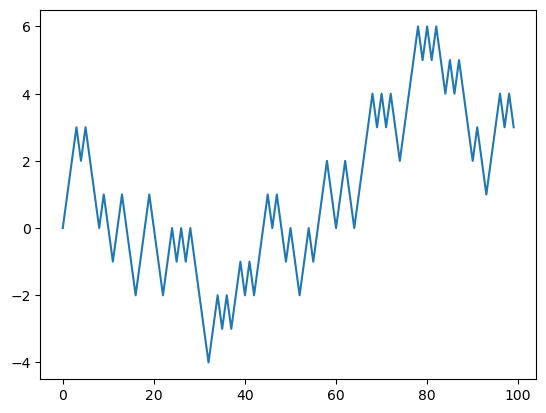

In [ ]:
import matplotlib.pyplot as plt
plt.plot(walk[:100])

可以观察到 walk 是随机步长的累积总和，可以计算为数组表达式。因此，我使用 numpy.random 模块一次抽取 1,000 次抛硬币，将它们设置为 1 和 –1，然后计算累积总和：

In [117]:
nsteps = 1_000
rng = np.random.default_rng(seed=12345)
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1) # np.where(condition, if True x, else y)
walk = steps.cumsum()
print(walk)


[  1   0   1   0  -1   0   1   2   3   2   3   2   3   4   3   2   1   2
   3   4   5   4   5   6   7   8   7   6   5   4   3   4   3   4   3   2
   1   2   3   2   3   2   1   0   1   0  -1  -2  -3  -4  -3  -2  -3  -4
  -5  -6  -7  -8  -9  -8  -7  -6  -5  -4  -5  -4  -3  -2  -1   0   1   2
   3   4   3   4   5   4   3   2   3   2   3   4   5   4   5   6   5   4
   3   2   3   2   3   2   1   0  -1   0  -1  -2  -1  -2  -1   0  -1  -2
  -3  -4  -3  -4  -3  -4  -3  -4  -3  -4  -5  -6  -5  -6  -7  -8  -7  -8
  -7  -8  -7  -8  -7  -8  -7  -8  -7  -8  -7  -6  -7  -8  -9  -8  -7  -8
  -9  -8  -9  -8  -7  -8  -7  -6  -7  -8  -9 -10 -11 -10  -9  -8  -9  -8
  -9 -10  -9 -10  -9  -8  -7  -8  -7  -6  -5  -6  -7  -6  -5  -6  -5  -6
  -7  -8  -9 -10  -9  -8  -7  -6  -5  -6  -5  -6  -7  -8  -7  -6  -7  -8
  -9 -10 -11 -12 -13 -14 -13 -12 -13 -14 -15 -14 -13 -14 -15 -14 -15 -16
 -17 -18 -19 -20 -21 -22 -23 -24 -25 -24 -23 -22 -23 -24 -23 -22 -21 -22
 -21 -20 -21 -20 -19 -20 -19 -20 -19 -20 -19 -20 -1

-50
8


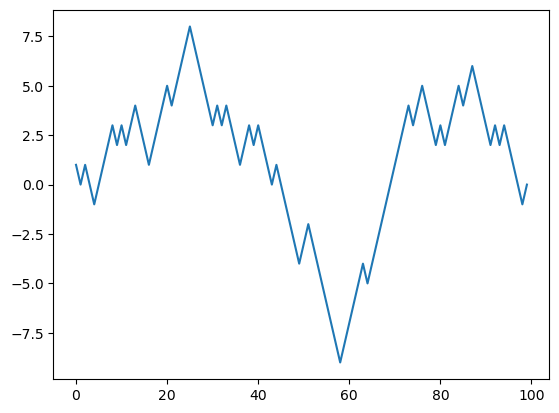

In [118]:
print(walk.min())
print(walk.max())
plt.plot(walk[:100])

In [ ]:
(np.abs(walk) >= 10).argmax()

# 1. 计算累计值 walk 数组每个元素的绝对值
# 2. 每个值与 10 比较
# 3. argmax() 的作用是返回数组中第一个最大值的索引。
# 在布尔数组中，True 被当作 1，False 被当作 0。返回第一个 True 的索引
# 整体作用：找出随机游走（`walk`）的路径中，第一次距离起点达到或超过10个单位的那个时刻（或步数）的索引。


np.int64(155)

.argmax() 方法

In [122]:
import numpy as np

# 假设这是一个随机游走的过程
walk = np.array([0, 2, -3, 5, -8, 7, 9, 11, 8, 15, -12])

# 步骤 1 & 2: 进行布尔比较
condition_met = (np.abs(walk) >= 10)

print(f"原始 walk 数组:       {walk}")
print(f"绝对值是否 >= 10:      {condition_met}")
   # 输出: [False False False False False False False True False True  True]
   #                                                 ^
   #                                                 |
   #                                             第一个 True 在这
   
   # 步骤 3: 在布尔数组上使用 argmax()
first_hit_index = condition_met.argmax()
   
print(f"\n第一个 True 的索引是: {first_hit_index}")
   # 输出: 7
   
print(f"在索引 {first_hit_index} 处，walk 的值是 {walk[first_hit_index]}，首次达到了阈值。")
   # 输出: 在索引 7 处，walk 的值是 11，首次达到了阈值。

原始 walk 数组:       [  0   2  -3   5  -8   7   9  11   8  15 -12]
绝对值是否 >= 10:      [False False False False False False False  True False  True  True]

第一个 True 的索引是: 7
在索引 7 处，walk 的值是 11，首次达到了阈值。


## Simulating Many Random Walks at Once

一次性计算所有 5000 次随机游走

In [129]:
nwalks = 5_000 # 随机游走的次数
nsteps = 1_000 # 单次随机游走的步数

draws = rng.integers(0, 2, size=(nwalks, nsteps)) 
# 生成一个二维NumPy数组（一个矩阵），其维度为 `nwalks` 行 `nsteps` 列，矩阵中填充的每个元素都是随机的整数0或1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
# 沿着数组的第1轴（即列）计算累计和
# 每个元素都是当前元素与之前所有元素的总和
# 结果是一个新的数组，其中每个元素都是原始数组中对应位置的累计和
walks

array([[  1,   2,   1, ..., -24, -25, -26],
       [ -1,   0,  -1, ...,  -2,  -1,   0],
       [  1,   0,   1, ..., -22, -23, -24],
       ...,
       [  1,   0,   1, ...,   0,   1,   0],
       [ -1,  -2,  -3, ...,  78,  77,  78],
       [  1,   2,   1, ..., -42, -41, -40]], shape=(5000, 1000))

In [ ]:
print(walks.max()) # 所有随机游走中，最大值
print(walks.min()) # 所有随机游走中，最小值

143
-125


In [ ]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
# 检查每一行（即每次随机游走）是否有任何一个元素的绝对值大于等于30
# any(axis=1) 表示在每一行中检查是否有任何一个元素为True
# 结果是一个一维布尔数组，长度为nwalks，每个元素表示对应行是否有元素的绝对值大于等于30
hits30


array([ True, False,  True, ..., False, False,  True], shape=(5000,))

In [ ]:
hits30.sum()
# 计算有多少次随机游走最终达到了或超过了30

np.int64(3369)

我们可以使用这个布尔数组来选择实际穿过绝对 30 级的行， 并跨轴 1 调用 argmax 来获取交叉时间：

In [ ]:
cross_times = (np.abs(walks) >= 30).argmax(axis=1)
# 计算每个随机游走最终达到或超过30的时间
# argmax(axis=1) 表示在每一行中找到第一个大于等于30的元素的索引(即 True 的索引)
# 结果是一个一维数组，长度为nwalks，每个元素表示对应行最终达到或超过30的时间
cross_times

array([917,   0, 507, ...,   0,   0, 801], shape=(5000,))

In [ ]:
cross_times.mean() # 所有随机游走平均达到或超过30的时间


np.float64(340.645)